In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import csv
import numpy as np
from matplotlib import style
import urllib
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

style.use("dark_background")

In [6]:
# candlestick graph


def bytespdate2num(fmt, encoding='utf-8'):
    #converts python data to matplotlib data
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock=None):
    
    fig = plt.figure
    ax1 = plt.subplot2grid((6,1), (0,0), towspan=1, colspan=1)
    ax2 = plt.subplot2grid((6,1), (1,0), towspan=4, colspan=1)
    ax3 = plt.subplot2grid((6,1), (5,0), towspan=1, colspan=1)
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    
    x = 0
    y = len(date)
    ohlc = []
    
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='g', colordown='r')
    
    for label in ax2.xaxis.get_ticklabels(): #this get the X tick labels
        label.set_rotation(45)
    
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
        
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title("Tesla")
    #plt.legend()
    #plt.subplots_adjust(left=0.09, bottom=0.18, right=0.94, top=0.95, wspace=0.2, hspace=0)
    plt.show()
    
graph_data()

AttributeError: Unknown property towspan

<Figure size 432x288 with 0 Axes>

/home/dan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: loadtxt: Empty input file: "[]"


IndexError: list assignment index out of range

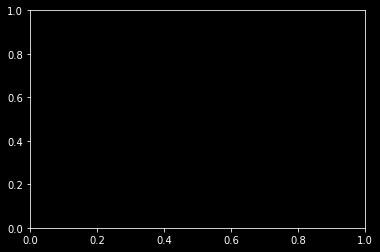

In [7]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock=None):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax1.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax1.text(date[10], closep[1],'Text Example', fontdict=font_dict)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()
    
graph_data()